In [14]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import missingno as msno

Importieren Sie das occupancy-Dataset

In [26]:
pfad = "../Datasets/occupancy.csv"

In [27]:
df = pd.read_csv(pfad)

In [28]:
del(df['Unnamed: 0'])

Lassen Sie sich das Dataset ausgeben:

In [29]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8138,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8139,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8140,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8141,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


Führen Sie die nötigen Pre-Processing Schritte durch wie in den vorherigen Übungen (z.B.: Prüfung auf Fehlwerte)

<AxesSubplot:>

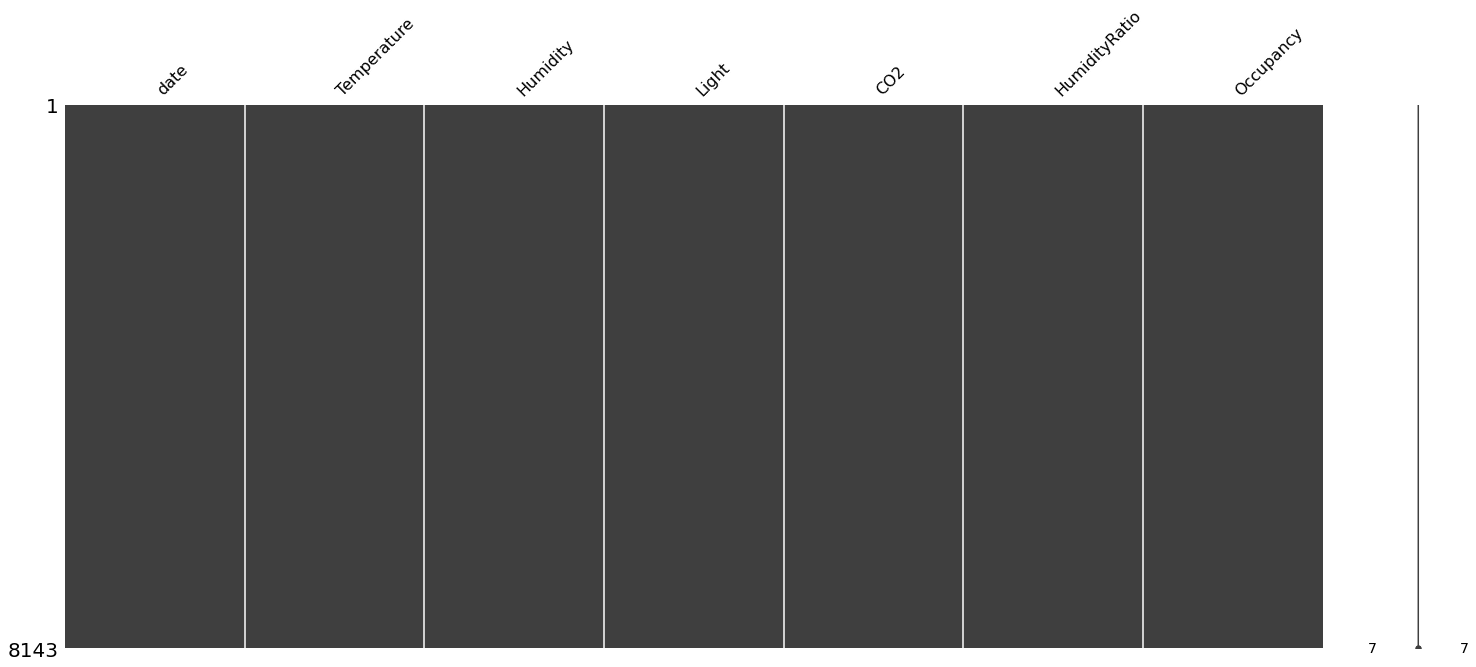

In [30]:
msno.matrix(df)

In [31]:
df['year'] = df['date'].astype("datetime64[ns]").dt.year.astype("object")
df['month'] = df['date'].astype("datetime64[ns]").dt.month.astype("object")
df['day'] = df['date'].astype("datetime64[ns]").dt.day.astype("object")

In [32]:
del(df['date'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
 6   year           8143 non-null   object 
 7   month          8143 non-null   object 
 8   day            8143 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 572.7+ KB


In [35]:
df2 = pd.get_dummies(df)

Teilen Sie das Dataset in Features und Label auf:

In [41]:
X = df2.loc[:,['Temperature','Humidity','Light','CO2',"HumidityRatio","year_2015","month_2","day_4","day_5","day_6","day_7","day_8","day_9"]]
y = df2.Occupancy

In [42]:
X

,Temperature,Humidity,Light,CO2,HumidityRatio,year_2015,month_2,day_4,day_5,day_6,day_7,day_8,day_9
0,23.18,27.2720,426.0,721.250000,0.004793,1,1,1,0,0,0,0,0
1,23.15,27.2675,429.5,714.000000,0.004783,1,1,1,0,0,0,0,0
2,23.15,27.2450,426.0,713.500000,0.004779,1,1,1,0,0,0,0,0
3,23.15,27.2000,426.0,708.250000,0.004772,1,1,1,0,0,0,0,0
4,23.10,27.2000,426.0,704.500000,0.004757,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,21.05,36.0975,433.0,787.250000,0.005579,1,1,0,0,0,0,0,0
8139,21.05,35.9950,433.0,789.500000,0.005563,1,1,0,0,0,0,0,0
8140,21.10,36.0950,433.0,798.500000,0.005596,1,1,0,0,0,0,0,0
8141,21.10,36.2600,433.0,820.333333,0.005621,1,1,0,0,0,0,0,0


In [43]:
y

0       1
1       1
2       1
3       1
4       1
       ..
8138    1
8139    1
8140    1
8141    1
8142    1
Name: Occupancy, Length: 8143, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = DecisionTreeClassifier(max_depth=5)

Trainieren Sie den Classifier mit dem Trainingsdatensatz, indem Sie die .fit()-Methode ausführen und Validieren den Ihr Modell indem Sie die .score()-Methode anwenden und Ihr Testset übergeben.

In [45]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.992633517495396

In [ ]:
## Nachteil: Dadurch, dass keine Pre-Processing Pipeline verwendet wird,
##müssen Daten One-Hot-Encoded in die Pipeline gefüttert werden